# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached widgetsnbextension-3.6.6-py2.py3-none-any.whl (1.6 MB)


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.10
    Uninstalling widgetsnbextension-4.0.10:
      Successfully uninstalled widgetsnbextension-4.0.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.2
    Uninstalling ipywidgets-8.1.2:
      Successfully uninstalled ipywidgets-8.1.2


## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install --upgrade jupyter notebook ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
Requirement already up-to-date: notebook in /root/.local/lib/python3.7/site-packages (6.5.7)
  Using cached ipywidgets-8.1.2-py3-none-any.whl (139 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl (2.3 MB)


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


In [5]:
# Define transforms - Dtransforms or simply manually with torch.Tensor.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))]) # 1 channel grayscale not 3 channels

# Define train and test data
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Define train and test loaders
train_loader = DataLoader(train_data, batch_size=28, shuffle=True)
test_loader = DataLoader(test_data, batch_size=28)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

transforms.ToTensor() : It converts the image data to a tensor format from numpy array to a pytorch tensor//

transforms.Normalize((0.5,), (0.5,)) : Normalization helps to standardize the input data, making it easier for the model to learn and converge.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training data dimensions:
Images shape: torch.Size([28])
Labels shape: torch.Size([28, 1, 28, 28])
6


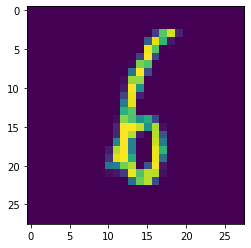

0


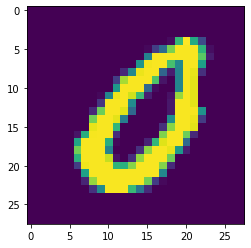

9


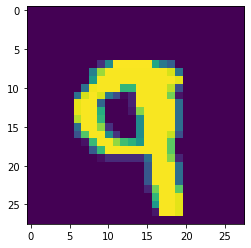

6


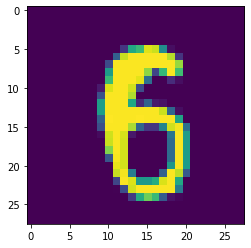

9


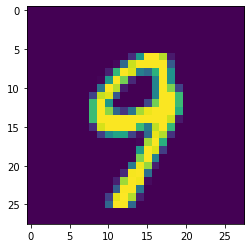

In [7]:
# Explore data
labels , images = next(iter(train_loader))
print("Training data dimensions:")
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
class Network(nn.Module):
  def __init__(self) :
     super().__init__()
     self.fc1 = nn.Linear(784,256)
     self.fc2 = nn.Linear(256,128)
     self.fc3 = nn.Linear(128,10)

  def forward(self,x):
    x = torch.flatten(x,1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x),dim=1)

    return x

net = Network()

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
optimizer = optim.SGD(net.parameters(), lr= 0.01 , momentum=0.8)
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device
net.to(device)

Network(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

Plot the training loss (and validation loss/accuracy, if recorded).

In [13]:
def train(num_epochs , optimizer, criterion , device, lr, momentum):

  for epoch in range(num_epochs):
      net.train()
      train_loss = 0
      train_correct = 0

      for i, data in enumerate(train_loader):
          inputs, labels = data
          inputs, labels = inputs.to(device), labels.to(device)

          optimizer.zero_grad()

          output = net(inputs)
          loss = criterion(output, labels)
          loss.backward()
          optimizer.step()

          _, pred = torch.max(output.data, 1)
          train_correct += (pred == labels).sum().item()
          train_loss += loss.item()

      print(f'Epoch {epoch + 1} training accuracy: {train_correct / len(train_data) * 100:.2f}%, training loss: {train_loss / len(train_loader):.5f}')


      net.eval()

In [14]:
train( 2 ,optimizer, criterion , device, lr=0.02, momentum=0.5)

Epoch 1 training accuracy: 90.38%, training loss: 1.56608
Epoch 2 training accuracy: 91.91%, training loss: 1.54691


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
with torch.no_grad():
      val_loss = 0
      coreect_val = 0
      for inputs , labels in test_loader:
        inputs , labels = inputs.to(device), labels.to(device)

        output = net(inputs)
        loss = criterion(output, labels)
        _ , pred = torch.max(output.data , 1)
        coreect_val += (labels == pred).sum().item()

        val_loss += loss.item()

      print(f' training accuracy: {coreect_val / len(test_data) * 100:.2f}%, training loss: {val_loss / len(test_loader):.5f}')

 training accuracy: 91.89%, training loss: 1.54673


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
train(10,optimizer, criterion , device, lr=0.02, momentum=0.9 )

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##